### 一，维度的诅咒  
#### 1.维数灾难：  
在给定精度下，准确地对某些变量的函数进行估计，所需样本量会随着样本维数的增加而呈指数形式增长  
#### 2.降维的意义：  
克服维数灾难，获取本质特征，节省存储空间，去除无用噪声，实现数据可视化   

同时在经管研究中，降维也可以作为数据处理步骤，将高维数据映射到低维空间，构建变量


### 二、PCA（线性降维）  

主成分分析是最流行的降维算法。首先，它识别最靠近数据的超平面，然后将数据进行投影

#### 1. 保留方差  
将训练集投影到低维超平面时，需要选择正确的超平面，即投影向量。该超平面需要最大化投影后的方差，即保留原始数据的最大方差  
选择保留最大方差的轴是因为它很可能会比其他投影丢失更少的信息  

#### 2. 主成分  
主成分是数据集的投影向量，用于将数据投影到低维空间。每个主成分都是原始特征的线性组合，且彼此正交（互相关为0）    

寻找主成分的方法是奇异值分解（SVD）：
  
$A = U \Sigma V^T$  
其中 $U$ 是一个 $n\times n$ 矩阵，包含了 $A$ 的左奇异向量；  
$\Sigma$ 是一个 $n\times m$ 矩阵，包含了 $A$ 的奇异值；  
$V^T$ 是一个 $m\times m$ 矩阵，包含了 $A$ 的右奇异向量

步骤：
1. 输入数据集 $X$，将数据集进行中心化处理，即减去均值；
2. 计算数据集的协方差矩阵 $C$；
3. 计算协方差矩阵的奇异值分解，得到 $U$，$\Sigma$，$V^T$；
4. 获取前 $k$ 个主成分，即 $\Sigma_{1:k}$；
5. 计算主成分的权重向量 $w$，即 $w = V$ $\Sigma_{1:k}$ $U^T$  

#### 3.投影到d维  
确定了所有主成分，就可以将数据集投影到前d个主成分定义的超平面上，从而将数据集的维度降低到d维  



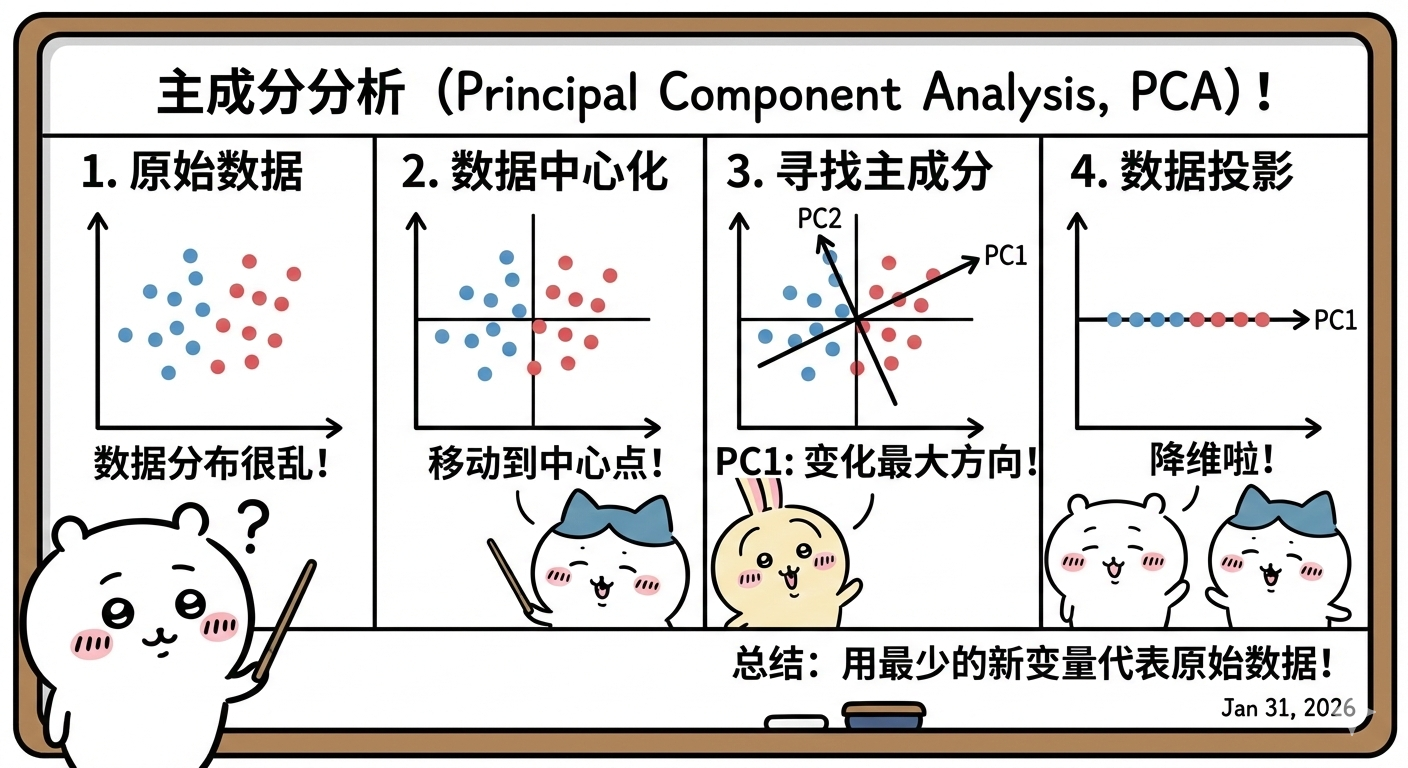

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 绘图样式设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示

In [3]:

digits = load_digits()
X, y = digits.data, digits.target  
print(f"原始数据维度：{X.shape}，类别数：{len(np.unique(y))}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify保持类别分布
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 训练集拟合+转换
X_test_scaled = scaler.transform(X_test)        # 测试集仅转换（避免数据泄露）

原始数据维度：(1797, 64)，类别数：10


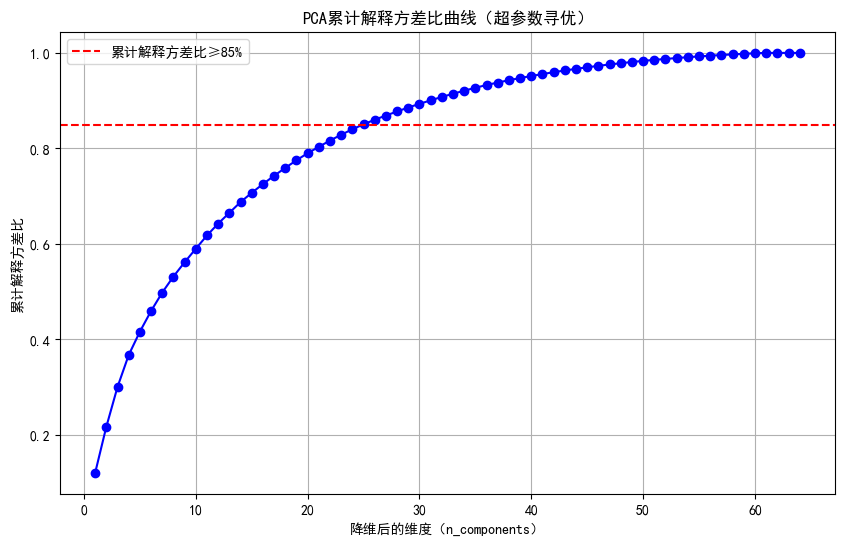

最优降维维度：25（累计解释方差比：0.8504）


In [5]:

pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_train_scaled)


cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 绘制累计解释方差比曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'b-', marker='o')
plt.axhline(y=0.85, color='r', linestyle='--', label='累计解释方差比≥85%')  # 常用阈值85%
plt.xlabel('降维后的维度（n_components）')
plt.ylabel('累计解释方差比')
plt.title('PCA累计解释方差比曲线（超参数寻优）')
plt.legend()
plt.grid(True)
plt.show()

# 找到最优维度（累计方差比≥85%的最小维度）
optimal_n = np.argmax(cumulative_variance >= 0.85) + 1
print(f"最优降维维度：{optimal_n}（累计解释方差比：{cumulative_variance[optimal_n-1]:.4f}）")

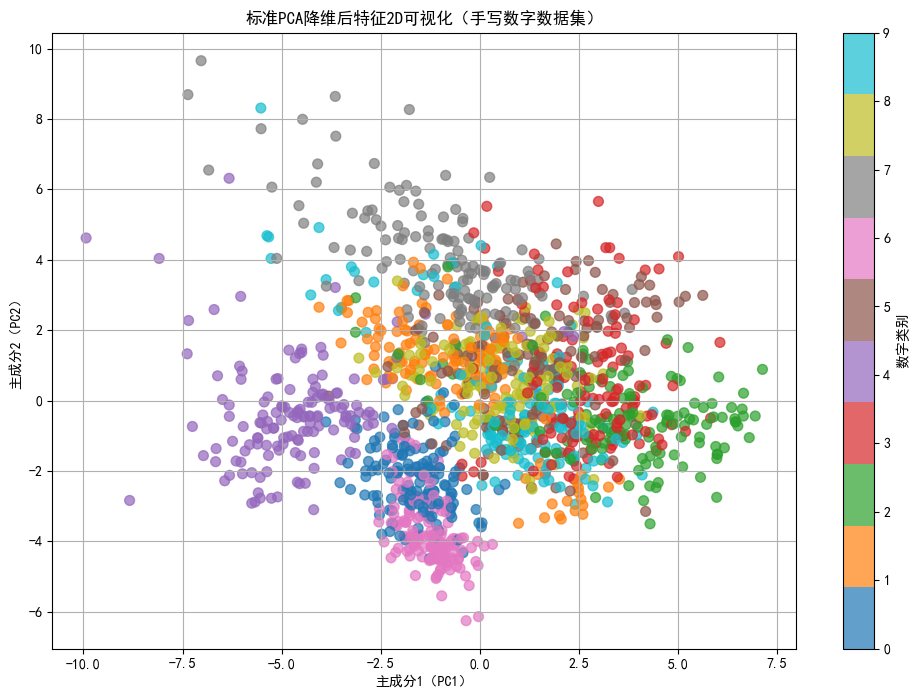

In [7]:
# 对训练集降维结果再做2D PCA投影
pca_2d = PCA(n_components=2, random_state=42)
X_train_pca_2d = pca_2d.fit_transform(X_train_pca)

# 绘制2D可视化图
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, 
                      cmap='tab10', alpha=0.7, s=50)
plt.xlabel('主成分1（PC1）')
plt.ylabel('主成分2（PC2）')
plt.title('标准PCA降维后特征2D可视化（手写数字数据集）')
plt.colorbar(scatter, label='数字类别')
plt.grid(True)
plt.show()
